Epoch 1/100
157/157 [==============================] - 5s 8ms/step - loss: 117.7712
Epoch 2/100
157/157 [==============================] - 1s 6ms/step - loss: 85.1108
Epoch 3/100
157/157 [==============================] - 1s 6ms/step - loss: 57.0881
Epoch 4/100
157/157 [==============================] - 1s 9ms/step - loss: 40.9479
Epoch 5/100
157/157 [==============================] - 1s 8ms/step - loss: 35.4842
Epoch 6/100
157/157 [==============================] - 2s 10ms/step - loss: 30.3718
Epoch 7/100
157/157 [==============================] - 1s 8ms/step - loss: 24.2895
Epoch 8/100
157/157 [==============================] - 1s 9ms/step - loss: 18.7074
Epoch 9/100
157/157 [==============================] - 1s 6ms/step - loss: 13.4827
Epoch 10/100
157/157 [==============================] - 2s 10ms/step - loss: 9.4003
Epoch 11/100
157/157 [==============================] - 2s 11ms/step - loss: 6.5459
Epoch 12/100
157/157 [==============================] - 1s 4ms/step - loss: 4.5302


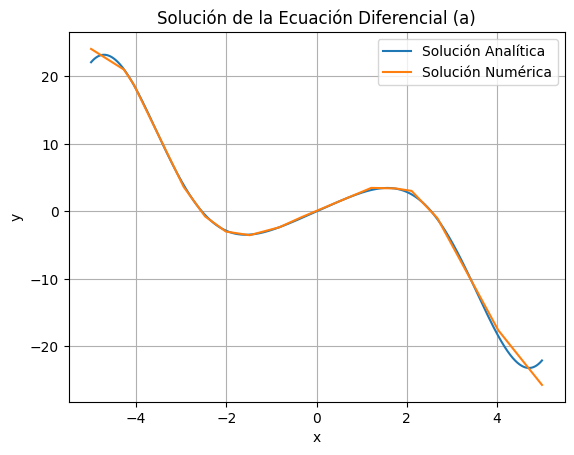

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf

#Definimos la primera ecuación, y su solución analitica (sacada resolviendo "a mano" la EDO)
def ecuacion_dif_a(x, y):
    return x * y + y - x**2 * np.cos(x)

def solucion_analitica_a(x):
    return np.sin(x) + x**2 * np.sin(x) + 2 * x * np.cos(x)

#Se crean los datos de entrenamiento
x_train = np.linspace(-5, 5, 5000)
y_train_a = solucion_analitica_a(x_train)

# Se crea la red neuronal para la primera EDO y se hace .compile y .fit
modelo_a = tf.keras.Sequential([
    tf.keras.layers.Dense(10, input_shape=(1,), activation='relu'),
    tf.keras.layers.Dense(10, activation='relu'),
    tf.keras.layers.Dense(1, activation='linear')
])

modelo_a.compile(optimizer='adam', loss='mean_squared_error')
modelo_a.fit(x_train, y_train_a, epochs=100, verbose=1)


# Graficación
y_pred_a = modelo_a.predict(x_train)

plt.plot(x_train, y_train_a, label='Solución Analítica')
plt.plot(x_train, y_pred_a, label='Solución Numérica')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.title('Solución de la Ecuación Diferencial (a)')
plt.grid(True)
plt.show()


Epoch 1/100
157/157 [==============================] - 1s 4ms/step - loss: 0.3035
Epoch 2/100
157/157 [==============================] - 1s 7ms/step - loss: 0.1817
Epoch 3/100
157/157 [==============================] - 1s 4ms/step - loss: 0.1391
Epoch 4/100
157/157 [==============================] - 1s 3ms/step - loss: 0.1089
Epoch 5/100
157/157 [==============================] - 1s 3ms/step - loss: 0.0867
Epoch 6/100
157/157 [==============================] - 0s 2ms/step - loss: 0.0672
Epoch 7/100
157/157 [==============================] - 0s 2ms/step - loss: 0.0498
Epoch 8/100
157/157 [==============================] - 0s 2ms/step - loss: 0.0354
Epoch 9/100
157/157 [==============================] - 0s 2ms/step - loss: 0.0242
Epoch 10/100
157/157 [==============================] - 0s 2ms/step - loss: 0.0164
Epoch 11/100
157/157 [==============================] - 0s 2ms/step - loss: 0.0117
Epoch 12/100
157/157 [==============================] - 0s 2ms/step - loss: 0.0086
Epoch 13/100


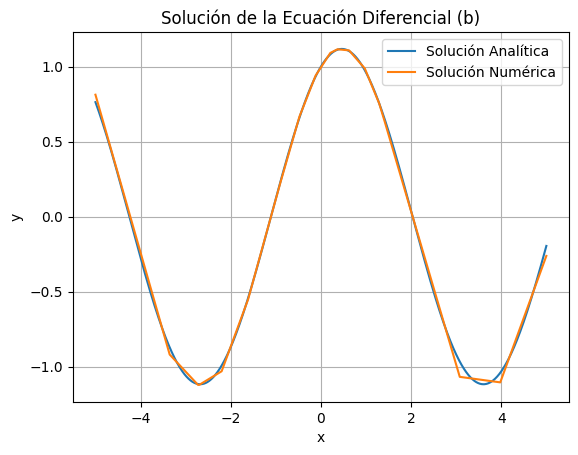

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf


#Lo mismo para la segunda, aquí se redujo el grado de la EDO
def ecuacion_dif_b(x, y_z):
    y, z = y_z
    return [z, -y]

def solucion_analitica_b(x):
    return np.cos(x) + 0.5 * np.sin(x)

#Se crean los datos de entrenamiento
x_train = np.linspace(-5, 5, 5000)
y_train_b = solucion_analitica_b(x_train)

# Lo mismo para la segunda
modelo_b = tf.keras.Sequential([
    tf.keras.layers.Dense(10, input_shape=(1,), activation='relu'),
    tf.keras.layers.Dense(10, activation='relu'),
    tf.keras.layers.Dense(2, activation='linear')
])

modelo_b.compile(optimizer='adam', loss='mean_squared_error')
modelo_b.fit(x_train, np.column_stack([y_train_b, np.gradient(y_train_b)]), epochs=100, verbose=1)

# Graficación
y_pred_b = modelo_b.predict(x_train)[:, 0]

plt.plot(x_train, y_train_b, label='Solución Analítica')
plt.plot(x_train, y_pred_b, label='Solución Numérica')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.title('Solución de la Ecuación Diferencial (b)')
plt.grid(True)
plt.show()
